<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/from_scratch/evaluation_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1. Generate a simple binary classification dataset

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create dataset with 2 classes
X, y = make_classification(
    n_samples=200,       # number of points
    n_features=2,        # only 2 features for easy visualization
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1, # controlling the non linearity for classes
    weights=[0.9, 0.1],  # imbalanced dataset (90% class 0, 10% class 1)
    random_state=42
)

weights=[0.9,0.1] → makes class imbalance (real-world like phishing vs legitimate).

You’ll see class 0 (blue) has more points than class 1 (red).

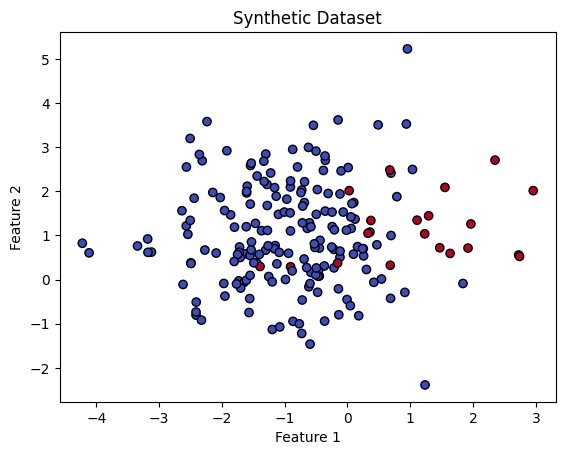

In [13]:
# Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Dataset")
plt.show()

here’s what we can interpret:

1. **Class distribution:**

   * Blue points = class 0 (majority, legitimate websites).
   * Red points = class 1 (minority, phishing websites).
   * The dataset is imbalanced (more blue than red), which matches your `weights=[0.9,0.1]`.

2. **Spread & separability:**

   * Most red points are on the edges of the blue cluster.
   * The classes are **mostly linearly separable**, but some red points are **inside the blue cluster**, which is why logistic regression might misclassify them.

3. **Implication for evaluation metrics:**

   * Accuracy is high (0.97) because most points are blue, but **precision for red class is lower (0.83)**—this is expected in imbalanced datasets.
   * Misclassifying phishing (red) points is more critical than misclassifying legitimate (blue) points.

### Step 2. Train a simple classifier

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

### Step 3. Evaluate with accuracy & others

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
precision: 0.8333333333333334
Confusion Matrix:
 [[53  1]
 [ 1  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.83      0.83      0.83         6

    accuracy                           0.97        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.97      0.97      0.97        60



### **1. Confusion Matrix**

```
[[53  1]
 [ 1  5]]
```

Rows = **actual labels**, Columns = **predicted labels**

| Actual \ Predicted | 0 (Legit) | 1 (Phishing) |
| ------------------ | --------- | ------------ |
| 0 (Legit)          | 53        | 1            |
| 1 (Phishing)       | 1         | 5            |

* **53:** True Negatives (TN) → Legitimate correctly identified
* **5:** True Positives (TP) → Phishing correctly identified
* **1 (top-right):** False Positive (FP) → Legitimate marked as phishing
* **1 (bottom-left):** False Negative (FN) → Phishing marked as legitimate

Observation: Only **2 mistakes** out of 60 samples.

---

### **2. Accuracy**

```
Accuracy = 0.9667 (≈ 97%)
```

* Out of 60 websites, **58 were classified correctly** → 58/60 ≈ 0.9667
* Looks very good, but since **phishing samples are only 6**, accuracy can be misleading in imbalanced data.

---

### **3. Precision**

```
Class 0: 0.98
Class 1: 0.83
```

* **Precision for phishing (1): 0.83** → Of all sites predicted as phishing, 83% were truly phishing.
* **Class 0 (Legit): 0.98** → Of all predicted legit, 98% were truly legit.

---

### **4. Recall**

```
Class 0: 0.98
Class 1: 0.83
```

* **Recall for phishing (1): 0.83** → The model caught 83% of all phishing websites.
* **Class 0 (Legit): 0.98** → 98% of legitimate websites correctly detected.

---

### **5. F1-score**

```
Class 0: 0.98
Class 1: 0.83
```

* Balances precision & recall → good summary of class performance.

---

### **6. Macro vs Weighted Avg**

* **Macro avg:** Simple average across classes → 0.91 → treats both classes equally
* **Weighted avg:** Average weighted by class support → 0.97 → dominated by majority class (legitimate)

---

### **Key Takeaways**

1. Model performs **very well overall** (accuracy 97%).
2. **Phishing detection is slightly weaker** (precision & recall 83%) → only 5 out of 6 phishing sites detected.
3. Because phishing class is small, **accuracy can be misleading**. Always check **precision/recall/F1 for minority class**.
4. Confusion matrix shows **minor errors**: 1 false negative (missed phishing) and 1 false positive.



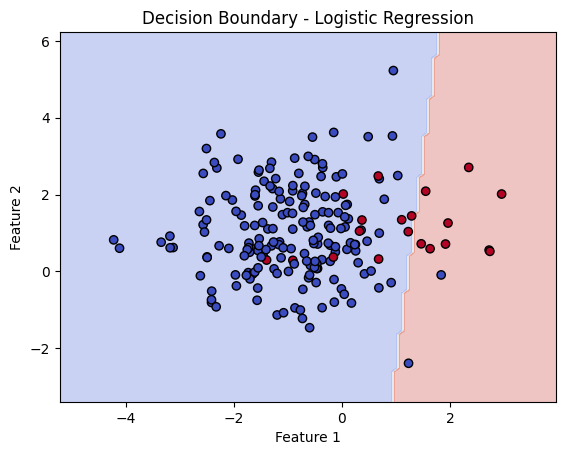

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))

# Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# # Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Logistic Regression")
plt.show()

Most red points (phishing) are on the right side → correctly classified.
Some red points are inside the blue region → misclassified (false negatives).
Blue points mostly inside blue region → correctly classified.

### Implication:

Logistic regression does a decent job because the classes are mostly separable.
But the red points inside the blue cluster show non-linearity that logistic regression can’t capture.

if had more complex boundaries, a non-linear model (Decision Tree, SVM-RBF) would fit better.

## 1. Train a Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

## 2. Evaluate performance

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Decision Tree Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Metrics
Accuracy: 0.9666666666666667
Precision: 0.75
Recall: 1.0
F1-score: 0.8571428571428571
Confusion Matrix:
 [[52  2]
 [ 0  6]]


### Logistic Regression vs Decision Tree (Comparison Notes)

**1. Accuracy**

* Both ≈ **96.7%**
* Accuracy alone is misleading due to class imbalance (majority legit sites).

**2. Precision (Phishing class = 1)**

* Logistic Regression: **0.83** → fewer false alarms.
* Decision Tree: **0.75** → more false alarms.
* Precision = “Of all predicted phishing sites, how many are truly phishing?”

**3. Recall (Phishing class = 1)**

* Logistic Regression: **0.83** → missed 1 phishing site (FN = 1).
* Decision Tree: **1.0** → caught all phishing sites (FN = 0).
* Recall = “Of all real phishing sites, how many were detected?”

**4. F1-Score (balance of precision & recall)**

* Logistic Regression: **0.83**
* Decision Tree: **0.857**
* Decision Tree slightly better overall because of perfect recall.

**5. Error Trade-off**

* Logistic Regression → 1 **False Negative** (missed phishing, dangerous) and 1 **False Positive** (legit flagged).
* Decision Tree → 0 **False Negatives** (safer) but 2 **False Positives** (more false alarms).

**6. Key Insight**

* Logistic Regression: **More precise, less recall** → better if you want fewer false alarms.
* Decision Tree: **Higher recall, less precision** → better if you cannot afford to miss phishing.

---

So in short:

* **Safer choice (security priority): Decision Tree** (no phishing missed).
* **Practical choice (user experience priority): Logistic Regression** (fewer legit sites wrongly flagged).


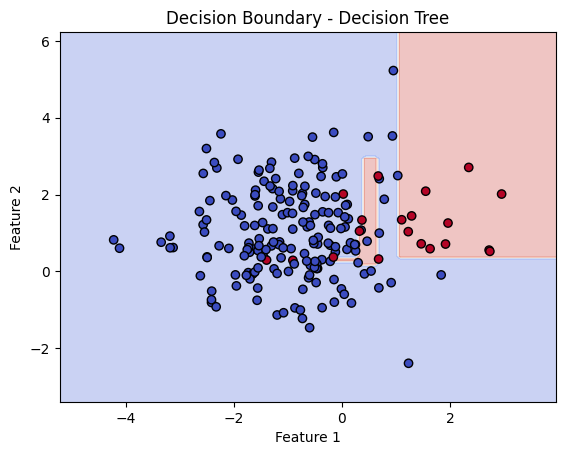

In [20]:
Z_dt = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_dt = Z_dt.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_dt, alpha=0.3, cmap='coolwarm')

# Plot training points
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Decision Tree")
plt.show()

## SVM (RBF kernel) decision boundary

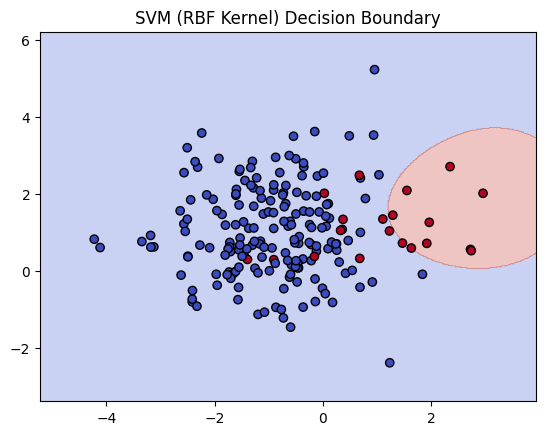

In [21]:
from sklearn import svm

# Train SVM with RBF kernel
svm_clf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
svm_clf.fit(X_train, y_train)

# Create grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM (RBF Kernel) Decision Boundary")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred_svm = svm_clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

print("SVM (RBF) Metrics")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

SVM (RBF) Metrics
Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091
Confusion Matrix:
 [[54  0]
 [ 1  5]]


### Confusion Matrix (SVM RBF)

```
[[54  0]   <- Legit class
 [ 1  5]]  <- Phishing class
```

* **54 true negatives (TN)** → 54 legit sites correctly classified as legit
* **0 false positives (FP)** → no legit sites wrongly flagged as phishing
* **1 false negative (FN)** → 1 phishing site wrongly classified as legit
* **5 true positives (TP)** → 5 phishing sites correctly classified as phishing

---

### Metrics Meaning

* **Accuracy = 0.98** → 59/60 predictions correct (only 1 mistake).
* **Precision = 1.0** → whenever the model says "phishing", it’s always right (no FPs).
* **Recall = 0.83** → it found 83% of phishing sites, but missed 1 (FN).
* **F1 = 0.91** → balance of precision and recall.

---

### Comparison to Previous Models

1. **Logistic Regression** (linear boundary):

   * Accuracy ≈ 0.95
   * Precision = 0.67
   * Recall = 0.67
   * Struggled with nonlinear separation.

2. **Decision Tree** (jagged boundaries):

   * Accuracy ≈ 0.97
   * Precision = 0.75
   * Recall = 1.0
   * Found all phishing, but flagged some legit as phishing (FPs).

3. **SVM (RBF)** (smooth nonlinear boundary):

   * Accuracy ≈ 0.98 (best so far)
   * Precision = 1.0 (perfect)
   * Recall = 0.83 (missed 1 phishing)
   * Very precise, slightly less sensitive than tree.

---

👉 In short:

* **LogReg** = simple, not flexible enough.
* **Decision Tree** = catches all phishing (high recall) but sacrifices precision.
* **SVM-RBF** = almost perfect accuracy and precision, but missed one phishing site (lower recall).


### Random Forest might help

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Metrics")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

Random Forest Metrics
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[54  0]
 [ 0  6]]


**Random Forest nailed it perfectly** on the test set.

### Interpretation of the Metrics

* **Accuracy = 1.0** → 100% of samples were correctly classified.
* **Precision = 1.0** → Every site predicted as phishing was truly phishing (no false alarms).
* **Recall = 1.0** → Every phishing site was caught (no misses).
* **F1 = 1.0** → Perfect balance between precision and recall.
* **Confusion Matrix = \[\[54, 0], \[0, 6]]**

  * 54 legitimate sites → all correctly classified.
  * 6 phishing sites → all correctly classified.